# Project: Clients' Personal Data Protection

### Project Description

The client is an insurance company, which want to develop a method for its clients' data encoding for better data protection.

### Project Objective

To develop an algorithm for clients' personal data encoding in order to make it difficult to recover the personal data.

### Project Design
1) Data preprocessing, data quality assurance.

2) Matrices manipulation.

3) Developing an algorithm for clients' personal data encoding.

4) The algorithm for encoding testing.

## Variables Description

**Features / regressors**: 

- 'age'
- 'gender'
- 'salary'
- 'family_members' - a number of family members.

**Target**: ***'insurance_payment'*** is a number of insurance payments within last 5 years.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1 Data Preprocessing

## 1.1 Data overview

In [59]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/01_LA_CustomerDataProtection/insurance.csv')

In [60]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [61]:
data.shape

(5000, 5)

In [62]:
data.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

In [63]:
data.rename(columns = 
        {'Пол': 'gender',
        'Возраст': 'age',
        'Зарплата': 'salary',
        'Члены семьи': 'family_members',
        'Страховые выплаты': 'insurance_payment'}, inplace=True)

## 1.2 Data quality assurance

In [64]:
data['salary'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: salary, dtype: float64

In [65]:
data['gender'].unique()

array([1, 0])

In [66]:
data['age'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

In [67]:
data['family_members'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [68]:
data['insurance_payment'].unique()

array([0, 1, 2, 3, 5, 4])

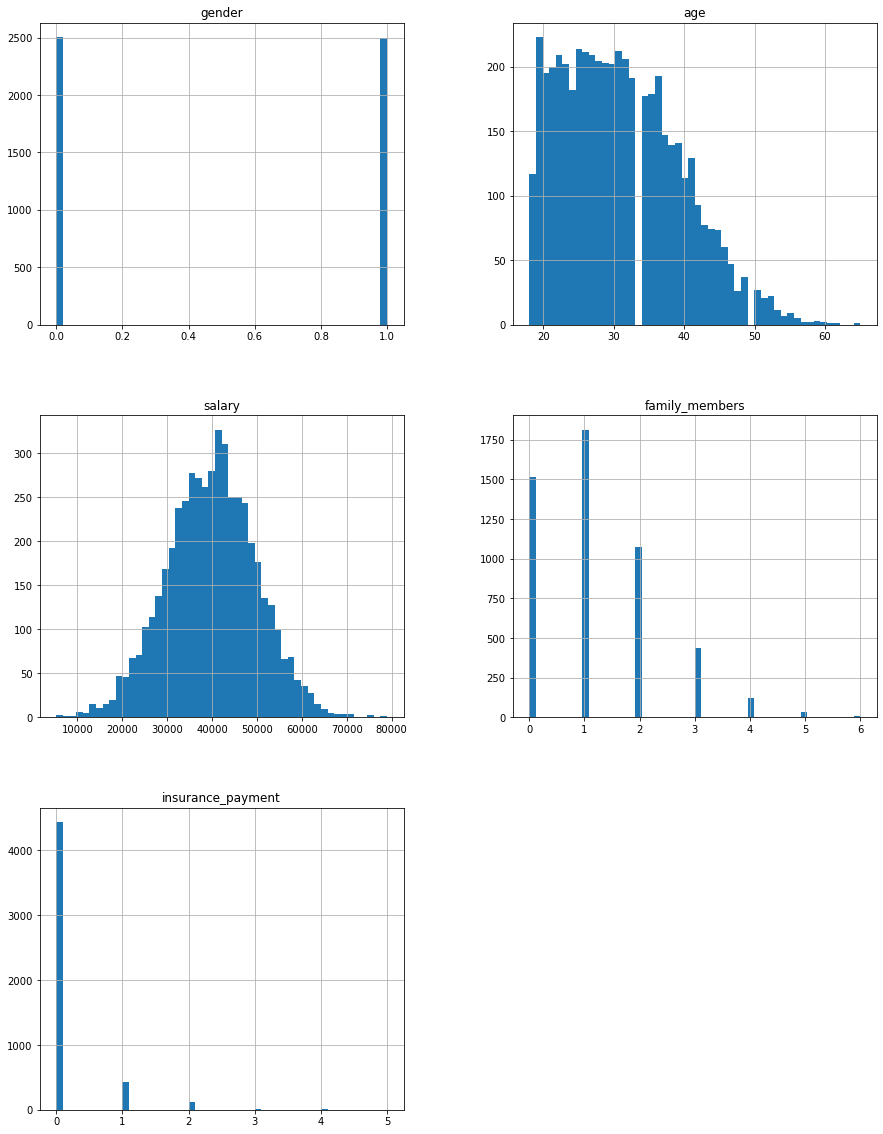

In [69]:
data.hist(bins=50, figsize=(15, 20));

### 1.3 Проверим данные на пропуски.

In [70]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
gender,0.000000
age,0.000000
salary,0.000000
family_members,0.000000
insurance_payment,0.000000


### 1.4 Exploratory Data Analysis

We are going to use linear regression for modeling and building an algorithm for data protection. Before we do that, it is good to check the regressors and output variables for multicollinearity issues.

In [71]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [72]:
from pandas_profiling import ProfileReport

In [75]:
report = ProfileReport(data)

In [76]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [78]:
data_overview = data.phik_matrix()
data_overview.round(2)

interval columns not set, guessing: ['gender', 'age', 'salary', 'family_members', 'insurance_payment']


,gender,age,salary,family_members,insurance_payment
gender,1.00,0.00,0.00,0.0,0.03
age,0.00,1.00,0.07,0.0,0.88
salary,0.00,0.07,1.00,0.0,0.00
family_members,0.00,0.00,0.00,1.0,0.00
insurance_payment,0.03,0.88,0.00,0.0,1.00


###  Вывод
From the Pearson's correlation matrix we can conlude that there is a correlation between the output variable 'insurance payment' and one of the regressors 'age'. This can be considered as limitation of the research.

In [79]:
data.describe()

,gender,age,salary,family_members,insurance_payment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


# 2 Matrix manupulation

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Преобразованная формула:

$$
w' = ((PX)^T PX)^{-1} (PX)^T y 
$$

$$
w' = ((\color{red}{\text{X}}P)^T \color{red}{\text{X}}P)^{-1} (\color{red}{\text{X}}P)^T y   
$$

Одно из свойств **обратных матриц**:  
- Обратное значение произведения обратимых матриц A и B с одинаковым числом строк и столбцов будет равно значению, полученному при умножении матриц, обратных исходным, то есть: 
$$(\color{red}{\text{A}}B)^{-1}=B^{-1}\color{red}{\text{A}}^{-1} \; (\color{blue}{\text{свойство 1}}) $$      
  
Одно из свойств **транспонированных матриц**:  

- Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке: 
$$(\color{red}{\text{A}}  B)^{T}= B^{T}  \color{red}{\text{A}}^{T} \; (\color{red}{\text{свойство 2}})$$  

Свойство **обратимых матриц**:  

- Произведение квадратной матрицы
$$\color{red}{\text{A}}B = B\color{red}{\text{A}} = I_n \; (\color{green}{\text{свойство 3}}) $$
</div>

**Ответ:** Не изменится

**Обоснование:** 

$$
w' = (P^TX^TPX)^{-1}P^TX^Ty =
$$

$$
= (P^TX^TPX)^{-1}P^TX^Ty =
$$

$$
= (P^T)^{-1}P^{-1}(X^TX)^{-1}P^TX^Ty =
$$

$$
= EP^{-1}(X^TX)^{-1}(PX)^Ty =
$$

$$
= P^{-1}w
$$

Тогда:

$$
a' = PXw' = PXP^{-1}w = Xw = a
$$

#### Вывод: 

Если мы домножим нашу матрицу признаков на обратную, то они в той же степени, что и значения обратной матрицы, пропорционально изменятся. Таким образом если мы рассмотрим пространство признаков с преобразованным пространством признаков, то все, что изменится, - это расстояние признаков, но относительно искомого значения мы не будем видеть разницы т.к хоть расстояние и изменится, но не изменится расстояние от ближайшего признака до цели

# 3 Algorythm Development

**Формула вычисления весов:**

- Транспонированная матрица признаков умножается на себя: X.T.dot(X)

- Вычисляется обратная к результату матрица: np.linalg.inv(...)

- Обратная умножается на транспонированную матрицу признаков: ... .dot(X.T)
- Результат умножается на вектор значений целевого признака: ... .dot(y)

$$
a' = PXw' = PXP^{-1}w = Xw = a
$$

# 4 Algorithm verification

In [80]:
train_data, valid_data = train_test_split(data, test_size=0.25, random_state=2355555)

In [81]:
train_data_features = train_data.drop('insurance_payment', axis=1)

In [82]:
train_data_target = train_data['insurance_payment']

In [83]:
valid_data_features = train_data.drop('insurance_payment', axis=1)

In [84]:
valid_data_target = train_data['insurance_payment']

In [85]:
# target = df['insurance_payment']
# features = df.drop(['insurance_payment'] , axis=1)
# features_train, features_test, target_train, target_test = train_test_split(
#     features, target, test_size=0.25, random_state=12345)

## 4.1 Linear regression without matrix manipulation

In [86]:
model_standard = LinearRegression()
model_standard.fit(train_data_features, train_data_target)
predictions_sd = model_standard.predict(valid_data_features)
r2_score_standard = round((r2_score(valid_data_target, predictions_sd) * 100), 2)
print('R2-score (без преобразований): {} %'.format(r2_score_standard))

R2-score (без преобразований): 40.77 %


## 4.2 Linear Regression with matrix manipulation

In [87]:
class LinearRegression:
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        
        # создадим матрицу весов признаков (a linear combination of weighted features)
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
    
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

We can also check the inversiveness of the matrix via determinant (inversive matrix had D = 0).
    `scipy.linalg.det`:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det

In [88]:
model = LinearRegression()
model.fit(train_data_features, train_data_target)
predictions = model.predict(valid_data_features)
r2_score = round((r2_score(valid_data_target, predictions_sd) * 100), 2)
print('R2-score (после преобразований): {} %'.format(r2_score))

R2-score (после преобразований): 40.77 %


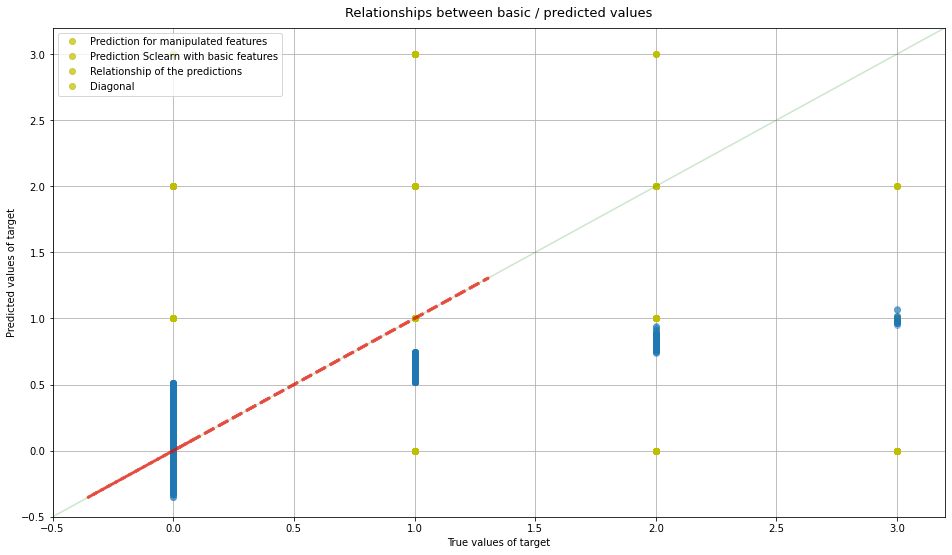

In [89]:
plt.figure(figsize=(16,9))
plt.plot(valid_data_target, valid_data_features,'yo',alpha=0.7)
plt.plot(valid_data_target, predictions,'o', alpha=0.4)
plt.plot(predictions_sd, predictions,'r--', alpha=0.7, linewidth = 3)
plt.plot([-0.5,3.2], [-0.5,3.2], linestyle='-', color='g', alpha=0.2)
plt.legend(['Prediction for manipulated features', \
            'Prediction Sclearn with basic features',\
            'Relationship of the predictions',\
            'Diagonal'], loc='upper left')

plt.xlim(-0.5,3.2)
plt.ylim(-0.5,3.2)
plt.title('Relationships between basic / predicted values', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('True values of target')
plt.ylabel('Predicted values of target')
plt.show()

In [90]:
print(r2_score_standard == r2_score)

True


# Conclusion
От нас требовалось защитить данные клиентов страховой компании и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Преобразование требовалось произвести  таким образом, чтобы по результату работы нашего алгоритма, качество моделей машинного обучения не ухудшилось.

В результате нашей работы был разработан <a href='step_3'>алгоритм</a>, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу $P$. 

Результатом такого преобразования явилась новая *(изменённая)* матрица признаков, которая справилась с основными задачами по шифровке данных и при сравнении качества предсказаний с моделью из $Scikit-learn$, сохранила значения $R2$ неизменными.

```
Thank you for going through this projet. Your comments are more then welcome to ybezginova2021@gmail.com

Best wishes,

Yulia
```